In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import nltk
import get_text
import validators
import markov_with_syllables as markov
from syllablizer import syllablize
from analysis import analyze_markov_syllables as analyze
import matplotlib.pyplot as plt
import numpy as np

nltk.download("words")

[nltk_data] Downloading package words to /home/softdes/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

We found a number of selections of texts, including books from Project Gutenberg and, and we created a dictionary of thoese texts in `get_text.py`, which contains helper functions to get those books as strings for analysis.

In [2]:
from get_text import books
keys = books.keys()
print(f"Texts in the dictionary are: {list(keys)}")

Texts in the dictionary are: ['Romeo and Juliet', "Finnegan's Wake", 'Great Gatsby', 'Canterbury Tales', 'Iliad', 'Monty Python']


If we want to add a limited selection of texts to our dictionary for analysis, or if we later want to add additional texts to our analysis corpora we can use the function `add_text`.

In [5]:
limited_selections=["Iliad", "Canterbury Tales", "Romeo and Juliet", "Great Gatsby", "Monty Python", "Finnegan's Wake"]
corpora = [get_text.get_texts(book) for book in limited_selections]

Next, we use functions from `helper.py` to give some data about our corpora.

In [ ]:
max_words = 10000
texts_analysis = analyze(corpora, max_words=max_words, verbose=False)

<class 'list'>
Text 1
<class 'str'>
Got syllables
Got word list
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
diomedon
hospitying
assemblood
reinfor
adled
commonious
penety
specian
firsteer
agames
Unique: 1073 Regen: 1711
English count: 1403. Sample:
he
removed
course
impede
chief
hector
prove
bow
pierce
unheed
Generated 10000 words, 1073 of which were unique.
Of the unique words, 1073 are new and 1711 are from the text
Of the new words, 1403 are actual words
Text 2
<class 'str'>
Got syllables
Got word list
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
legendeless
desigench
burnty
countroiles
ivilke
stanony
beganonce
chrisphere
truling
betweened
Unique: 1441 Regen: 1976
English count: 1559. Sample:
he
doubt
low
removed
course
ament
pierce
season
sake
possible
Generated 10000 words, 1441 of which were unique.
Of the unique words, 1441 are new and 1976 are from the text
Of the new words, 1559 are actual words
Text 3
<class 'str'>
Got syllables
Got word list
1000
2000
3000
4000


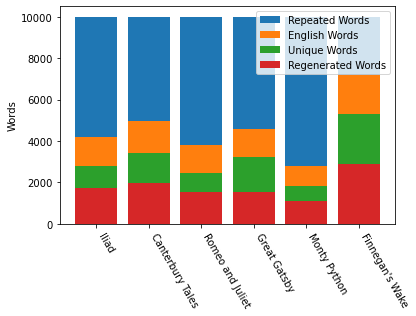

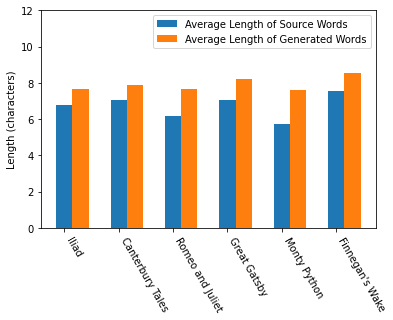

In [9]:
unique = []
regen = []
ur_sum = []
english = []
ure_sum = []
repeats = []
word_len = []
markov_len = []
for index in range(len(corpora)):
    analysis = texts_analysis[index]
    unique.append(analysis["unique_count"])
    regen.append(analysis["regenerated_count"])
    english.append(analysis["english_count"])
    ur_sum.append(unique[-1] + regen[-1])
    ure_sum.append(ur_sum[-1] + english[-1])
    repeats.append(max_words - ure_sum[-1])
    word_len.append(analysis["average_word_length"])
    markov_len.append(analysis["average_unique_markov_word_length"])

fig, ax = plt.subplots()
ax.bar(limited_selections, repeats, label = "Repeated Words", bottom=ure_sum)
ax.bar(limited_selections, english, label="English Words", bottom=ur_sum)
ax.bar(limited_selections, unique, label="Unique Words", bottom=regen)
ax.bar(limited_selections, regen, label="Regenerated Words")
ax.set_ylabel("Words")
for tick in ax.get_xticklabels():
    tick.set_rotation(-60)
    tick.set_horizontalalignment("left")
ax.legend()
plt.show()

fig, ax = plt.subplots()
width = 0.3
indexes = np.arange(len(limited_selections))
ax.bar(limited_selections, word_len, width, label="Average Length of Source Words")
ax.bar(indexes+width, markov_len, width, label="Average Length of Generated Words")

ax.set_ylabel("Length (characters)")
ax.set_ylim([0, 12])
for tick in ax.get_xticklabels():
    tick.set_rotation(-60)
    tick.set_horizontalalignment("left")
ax.legend()
plt.show()